In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Importing necessary modules and functions from your files
from GIANTS_data_load_and_preprocessing import load_data, preprocess_data
from GIANTS_kano_analysis import (get_feature_names, prepare_kano_data, apply_kano_scoring, calculate_kano_averages, plot_kano_results, 
                                  plot_kano_by_age_group, plot_feature_means_with_std
)
from GIANTS_clustering import preprocess_for_clustering, perform_clustering, plot_elbow_method, pca_and_visualize



# Step 1: Load the data
file_path = "C:/Users/TomiNordi2m/OneDrive - i2m Unternehmensentwicklung GmbH/Documents/Python/GIANTS Survey Data Analysis/Copy of 2024.09.12 GIANTS project_ User and stakeholder needs survey (Responses).xlsx"
df = load_data(file_path)

# Step 2: Preprocess the data
df = preprocess_data(df)


# Step 3: Prepare Kano data
df_kano = prepare_kano_data(df)

# Step 4: Get feature names for Kano analysis
feature_names = get_feature_names()



# Step 5: Apply Kano scoring
df_kano = apply_kano_scoring(df_kano, feature_names)

# Step 6: Calculate Kano averages
df_averages = calculate_kano_averages(df_kano, feature_names)

# Step 7: Plot Kano results 
plot_kano_results(df_averages)






['Timestamp', 'GENDER', 'AGE', 'COUNTRY', 'CITY', '5. What is the population where you live? (*If you are completing this survey as a fleet operator, public authority, etc. the population of the primary city of your operations / city you represent)', 'USER TYPE', 'EDUCATION', 'ADULTS', 'KIDS', 'TODDLERS', 'INFANTS', 'INCOME', '10. Please indicate the typical elevation profile of the areas where you drive most frequently. Choose the option that best describes the terrain:', '11. Road quality: What type of terrain do you primarily drive on? Please select the option that best describes the surface conditions of the roads you typically use: ', '12. What type and how many vehicles does your household currently own? [Sedan (traditional passenger car)]', '12. What type and how many vehicles does your household currently own? [SUV / Truck]', '12. What type and how many vehicles does your household currently own? [Three-wheel vehicle]', '12. What type and how many vehicles does your household c

In [2]:
def plot_kano_results_with_errors(df_averages, plot_title='Kano Model with Errors'):
    """Plots Kano results using Plotly with error bars for functional and dysfunctional scores."""
    fig = px.scatter(df_averages,
                     x='Average Dysfunctional Score',
                     y='Average Functional Score',
                     text='Feature', 
                     title=plot_title,
                     error_x='Dysfunctional StdDev',  # Add standard deviation for dysfunctional scores
                     error_y='Functional StdDev')  # Add standard deviation for functional scores

   

# Step 6: Calculate Kano averages
df_averages = calculate_kano_averages(df_kano, feature_names)


# Step 7: Plot Kano results with standard deviations
plot_kano_results(df_averages)


In [3]:
#plot_interactive_scatter_for_feature(df_kano, 'Doors')

c:\Users\TomiNordi2m\OneDrive - i2m Unternehmensentwicklung GmbH\Documents\Python\GIANTS Survey Data Analysis\GIANTS_kano_analysis.py:94: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.

c:\Users\TomiNordi2m\OneDrive - i2m Unternehmensentwicklung GmbH\Documents\Python\GIANTS Survey Data Analysis\GIANTS_kano_analysis.py:98: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.



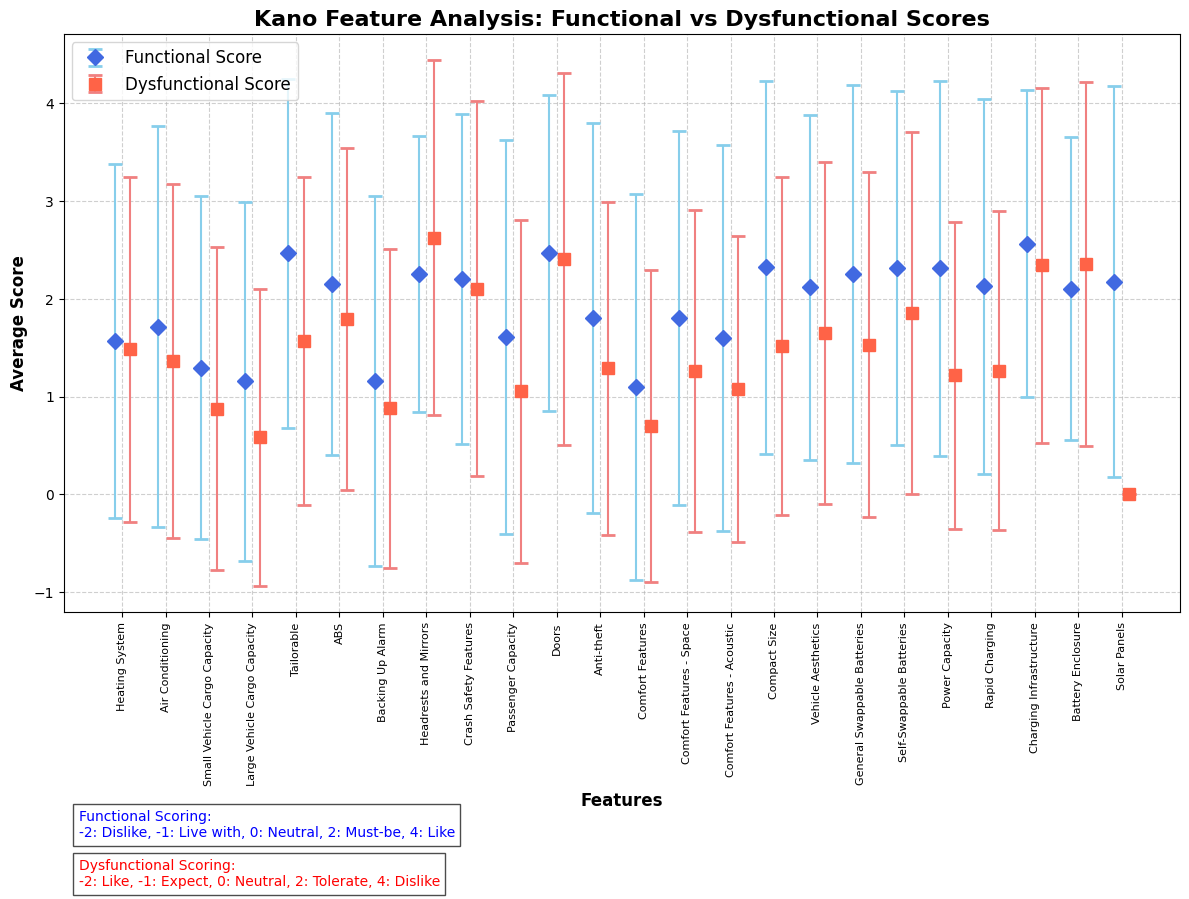

In [4]:
#Standard Deviations of Features
plot_feature_means_with_std(df_averages)


In [5]:
# Step 8: Plot Kano analysis for each age group (set show_plot to False to avoid showing)
#plot_kano_by_age_group(df, df_kano, feature_names)

In [6]:
#kano_analysis_for_students(df, df_kano, feature_names)

In [7]:

# Step 9: Plot the market distribution
#plot_market_distribution(df)


# Plot age distribution
#plot_age_distribution(df)

# Plot income distribution
#plot_income_distribution(df)

#Plot user type distribution
#plot_user_type_distribution(df)


#df = apply_persona_classification(df)

# Print the first few rows to check the classified personas
#print(df[['Persona']].head(20))

In [8]:
# Preprocess specifically for clustering (inside the clustering module)
df_scaled, df_encoded = preprocess_for_clustering(df)

# Perform clustering
df_with_clusters = perform_clustering(df_scaled, df_encoded)

# Plot the elbow method to find the optimal number of clusters
plot_elbow_method(df_scaled, max_clusters=10)




TypeError: preprocess_for_clustering() missing 1 required positional argument: 'importance_columns'

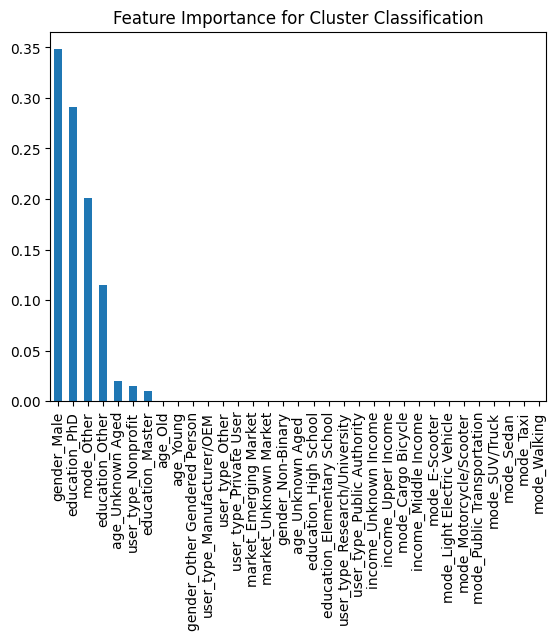

In [9]:
# 4. Visualize clusters using PCA
pca, df_pca = pca_and_visualize(df_scaled, df_with_clusters)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
importances = []

# Define features and labels
features = df_with_clusters.drop(columns=['cluster'])
labels = df_with_clusters['cluster']

# Fit a decision tree
tree = DecisionTreeClassifier()
tree.fit(features, labels)

# Get feature importance
importances = pd.Series(tree.feature_importances_, index=features.columns)
importances.sort_values(ascending=False).plot(kind='bar', title='Feature Importance for Cluster Classification')
plt.show()

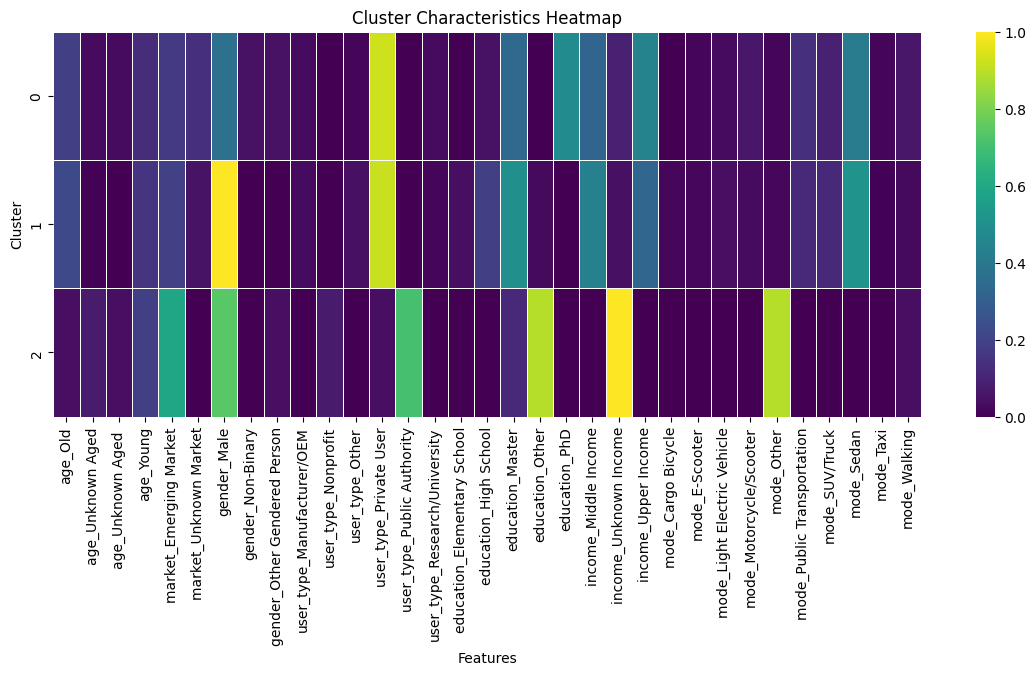

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by cluster and compute the mean of each feature to see the average profile per cluster
cluster_summary = df_with_clusters.groupby('cluster').mean()

# Create a heatmap for cluster characteristics with smaller cells and without numbers inside
plt.figure(figsize=(14, 5))  # Adjust the figure size to make cells less tall
sns.heatmap(cluster_summary, cmap='viridis', annot=False, linewidths=0.5, cbar=True)  # Set annot to False to remove numbers inside
plt.title('Cluster Characteristics Heatmap')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.xticks(rotation=90)
plt.show()



In [11]:
# Step 1: Define the vehicle feature columns as the importance columns
vehicle_features_columns = [col for col in df.columns if '55' in col or '56' in col or '57' in col]

# Step 2: Preprocess the data for clustering (impute only importance questions, encode, and scale)
df_scaled, df_encoded = preprocess_for_clustering(df, vehicle_features_columns)

# Step 3: Perform clustering using the existing function
n_clusters = 3  # Adjust the number of clusters as needed
df_with_clusters = perform_clustering(df_scaled, df_encoded, n_clusters=n_clusters)

# Step 4: Visualize the clusters using PCA
pca, df_pca = pca_and_visualize(df_scaled, df_with_clusters)

# Step 5: Summarize the clusters
cluster_summary = summarize_clusters(df_with_clusters)
print(cluster_summary)


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values